In [ ]:
# To Do: try partitioned circuits
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import (
    QiskitRuntimeService,
    SamplerV2 as Sampler,
    EstimatorV2 as Estimator,
    Batch,
)
from heisenberg import HeisenbergModel, get_n_steps, get_prob0
from qiskit.quantum_info.operators import Operator
from qiskit_aer import AerSimulator

In [ ]:
n_qubits = 4
n_samples = 10

rng = np.random.default_rng(40)
Js_list = [2 * rng.random(n_qubits - 1) - 1 for _ in range(n_samples)]
# Js = 2 * rng.random(n_qubits - 1) - 1
# Js = [1, -1, 1]

# total time to be simulated
# times = np.linspace(0, 10, 100)
times = np.linspace(0, 1.5, 20)

# Option1: Use IBM Quantum backend.
# If you did not previously save your credentials, use the following line instead:
# service = QiskitRuntimeService(channel="ibm_quantum", token="<MY_IBM_QUANTUM_TOKEN>")
# service = QiskitRuntimeService()
# backend = service.least_busy(simulator=False, operational=True)

# Option2: Use local AerSimulator as the backend.
backend = AerSimulator()

print(f"Using backend: {backend}")

Using backend: AerSimulator('aer_simulator')


In [ ]:
for Js in Js_list:
    heisenberg = HeisenbergModel(backend, n_qubits, Js)
    exact_results = []

    for t in times:
        n_steps = get_n_steps(t)
        exact_result = heisenberg.exact_simulation(t, phase=0)
        print(f"t = {t}")
        print(f"exact_result = {exact_result}")

        exact_results.append(exact_result)

t = 0.0
exact_result = 0.9999999999999996
t = 0.07894736842105263
exact_result = 0.9855397292789062
t = 0.15789473684210525
exact_result = 0.9438810619440695
t = 0.23684210526315788
exact_result = 0.8799524322308786
t = 0.3157894736842105
exact_result = 0.8012089585903124
t = 0.39473684210526316
exact_result = 0.7166093161064239
t = 0.47368421052631576
exact_result = 0.6353963166270754
t = 0.5526315789473684
exact_result = 0.5658557993191204
t = 0.631578947368421
exact_result = 0.514230084725092
t = 0.7105263157894737
exact_result = 0.48393809777063174
t = 0.7894736842105263
exact_result = 0.4752081056296278
t = 0.8684210526315789
exact_result = 0.48516789430240115
t = 0.9473684210526315
exact_result = 0.5083703440185403
t = 1.026315789473684
exact_result = 0.5376697362854764
t = 1.1052631578947367
exact_result = 0.5653149537252221
t = 1.1842105263157894
exact_result = 0.5840970934313796
t = 1.263157894736842
exact_result = 0.5883847963915597
t = 1.3421052631578947
exact_result = 0.574

In [5]:
isa_circuits = []

for t in times:
    n_steps = get_n_steps(t)

    isa_circuit = heisenberg.get_trotter_simulation_pub(t, n_steps, phase=0)
    isa_circuits.append(isa_circuit)

In [6]:
with Batch(backend=backend):
    sampler = Sampler()
    sampler.options.default_shots = 1000

    # Turn on dynamical decoupling.
    # sampler.options.dynamical_decoupling.enable = True
    # sampler.options.dynamical_decoupling.sequence_type = "XpXm"

    # Turn on twirling.
    # sampler.options.twirling.enable_gates = True
    # sampler.options.twirling.strategy = "all"

    # Run job.
    job = sampler.run(isa_circuits)
    print(f"job_id: {job.job_id()}")

    # estimator = Estimator()
    # estimator.options.default_shots = 1000
    # estimator.options.resilience_level = 2

job_id: 4df505b6-a456-46d2-90e3-a91853c3ecae


In [7]:
# Post-processing
# Option1: Use IBM Quantum backend.
# retrieved_job = service.job(job.job_id())
# retrieved_job = service.job("cwqahe55v39g008h40c0")

# Option2: Use local AerSimulator as the backend.
retrieved_job = job

probs = []

for result in retrieved_job.result():
    prob0 = get_prob0(result, n_qubits)
    probs.append(prob0)

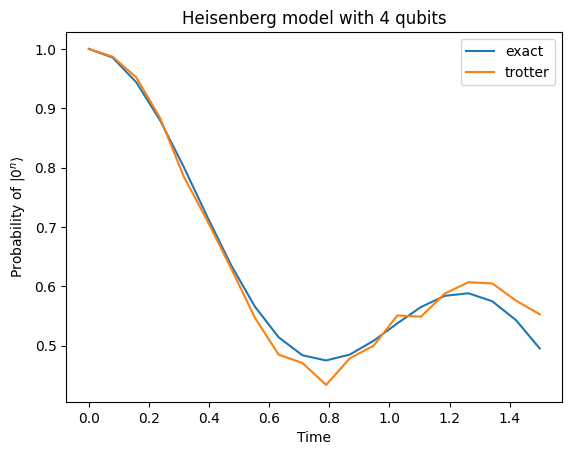

In [8]:
# Plot the results
plt.plot(times, exact_results, label="exact")
plt.plot(times, probs, label="trotter")
plt.title(f"Heisenberg model with {n_qubits} qubits")
plt.xlabel("Time")
plt.ylabel("Probability of $|0^n\\rangle$")
plt.legend()
plt.show()